# An Introduction to the DFT

## Lecture 5: A Simple Application: Noise Filtering

#### Noise Filtering

I created a sound file that has a recording of a trumpet sound plus some generated high frequency noise.

In [1]:
import numpy as np
from scipy.io import wavfile
from IPython.display import Audio
import matplotlib.pyplot as plt
%matplotlib inline

Read in the `trumpet_chirp.wav` file. Play the audio and notice the high pitch noise on top of a trumpet note.

In [2]:
fs, ys = wavfile.read("trumpet_chirp.wav")

In [3]:
Audio(ys, rate=fs)

Use `plot_signal_freq` below to plot the frequency domain to see the frequencies in the signal. Note that the signal has a linear sweep of high frequencies, which is the noise that you hear.

Zoom in using `plot_signal_freq` and estimate the range of these frequencies.

In [4]:
def plot_signal_freq(ys, f1, f2, fs = 44100, figsize=(12,4), complex_=True):
    if complex_:
        yk = np.fft.fft(ys)
    else:
        yk = np.fft.rfft(ys)

    N = ys.size
    L = N/fs
    k = np.arange(yk.size)
    freqs = k/L

    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(freqs, np.abs(yk))

    ax.set_xlim(f1,f2)
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel(r'$|Y_{k}|$')

    plt.show()

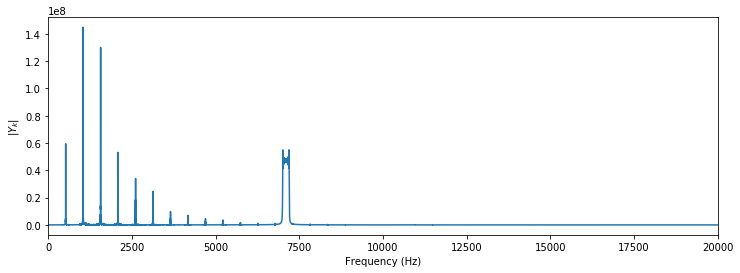

In [5]:
# Whole signal
plot_signal_freq(ys, f1=0, f2=20000, fs=fs)

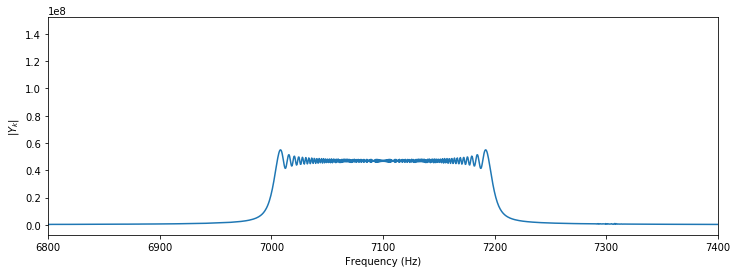

In [6]:
# Zooming in
plot_signal_freq(ys, f1=6800, f2=7400, fs=fs)

***

For this problem, use `np.fft.rfft` to apply the DFT.

We learned that a real signal has a symmetric spectrum; this function only returns half od Fourier coefficients. It ignores the second symmetric half. Thus, we're only considering the frequencies up to the Nyquist frequency.

Let's note the difference between `np.fft.fft` and `np.fft.rfft`.

In [7]:
ykc = np.fft.fft(ys)
ykr = np.fft.rfft(ys)

print(ykc.size, ykr.size)

100000 50001


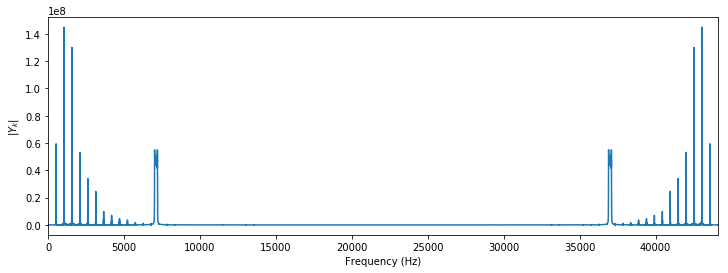

In [8]:
# Complex spectrum
plot_signal_freq(ys, f1=0, f2=fs, fs=fs, complex_=True)

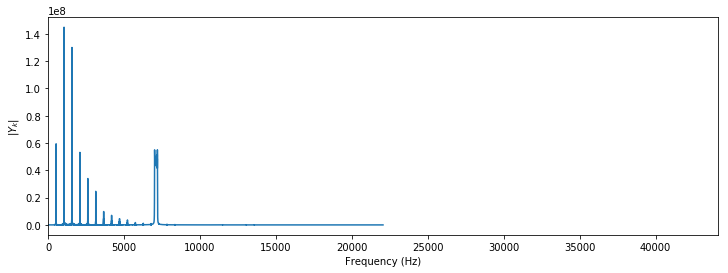

In [9]:
# Real spectrum
plot_signal_freq(ys, f1=0, f2=fs, fs=fs, complex_=False)

***

In [10]:
yk = np.fft.rfft(ys)

In [11]:
N = ys.size
L = N/fs
k = np.arange(yk.size)
freqs = k/L

In [12]:
sel_noise = (freqs > 6950) & (freqs < 7250)

In [13]:
filtered_yk = np.abs(yk)
filtered_yk[sel_noise] = 0.0

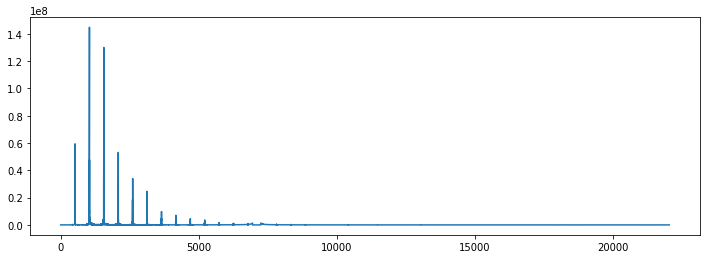

In [14]:
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(freqs, filtered_yk)

plt.show()

In [15]:
filtered_ys = np.fft.irfft(filtered_yk)

For more on `np.fft.irfft` [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.irfft.html).

In [16]:
Audio(filtered_ys, rate=fs)